# Competición Kaggle Prueba 2

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import pylab as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
# Descargamos los datos de train y test(Los datos de train son solo para entrenar y los datos de test son para predecir)

df = pd.read_csv(r'C:\Users\mario\OneDrive\Escritorio\Bootcamp\ds_tb_part_21_09\data\train_diamantes.csv') # Datos con el precio
df_2 = pd.read_csv(r'C:\Users\mario\OneDrive\Escritorio\Bootcamp\ds_tb_part_21_09\data\test_diamantes.csv') # Datos sin el precio

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,id
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,6.33,6.38,3.95,0
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,6.22,6.25,3.83,1
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,5.19,5.23,3.24,2
3,0.32,Ideal,I,IF,60.8,54.0,673.0,4.44,4.47,2.71,3
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,6.55,6.57,4.00,4


In [3]:
df = df.drop('id', axis = 1) # Eliminamos columna id

### Análisis exploratorio

In [4]:
df_train = df.copy()
df_test = df_2.copy()

In [5]:
df_train.shape

(35940, 10)

In [6]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35940 entries, 0 to 35939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    35940 non-null  float64
 1   cut      35940 non-null  object 
 2   color    35940 non-null  object 
 3   clarity  35940 non-null  object 
 4   depth    35940 non-null  float64
 5   table    35940 non-null  float64
 6   price    35940 non-null  float64
 7   x        35940 non-null  float64
 8   y        35940 non-null  float64
 9   z        35940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [8]:
df_train.isna().sum() # No tenemos NAs

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_train.describe()

,carat,depth,table,price,x,y,z
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000
mean,0.907500,61.756210,57.461753,3930.117835,5.728928,5.731430,3.537112
std,2.098015,1.431872,2.240414,3982.706797,1.121504,1.121685,0.695298
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2394.000000,5.690000,5.710000,3.520000
75%,1.050000,62.500000,59.000000,5362.250000,6.540000,6.540000,4.040000
max,49.990359,79.000000,95.000000,18823.000000,10.230000,31.800000,6.720000


### Análisis de datos y visualización

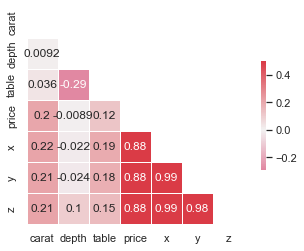

In [10]:
# Observamos la correlación

corr = df_train.corr(method='pearson')

sns.set(style='white')  # estilo blanco

mask=np.triu(np.ones_like(corr, dtype=bool)) # genera una mascara para ocultar la triangular superior

cmap=sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores con degradado


# heatmap o mapa de calor

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

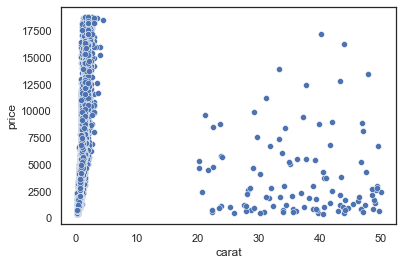

In [11]:
sns.scatterplot(x=df_train.carat, y=df_train.price); # Hay muchos outliers en carat de momento los dejamos

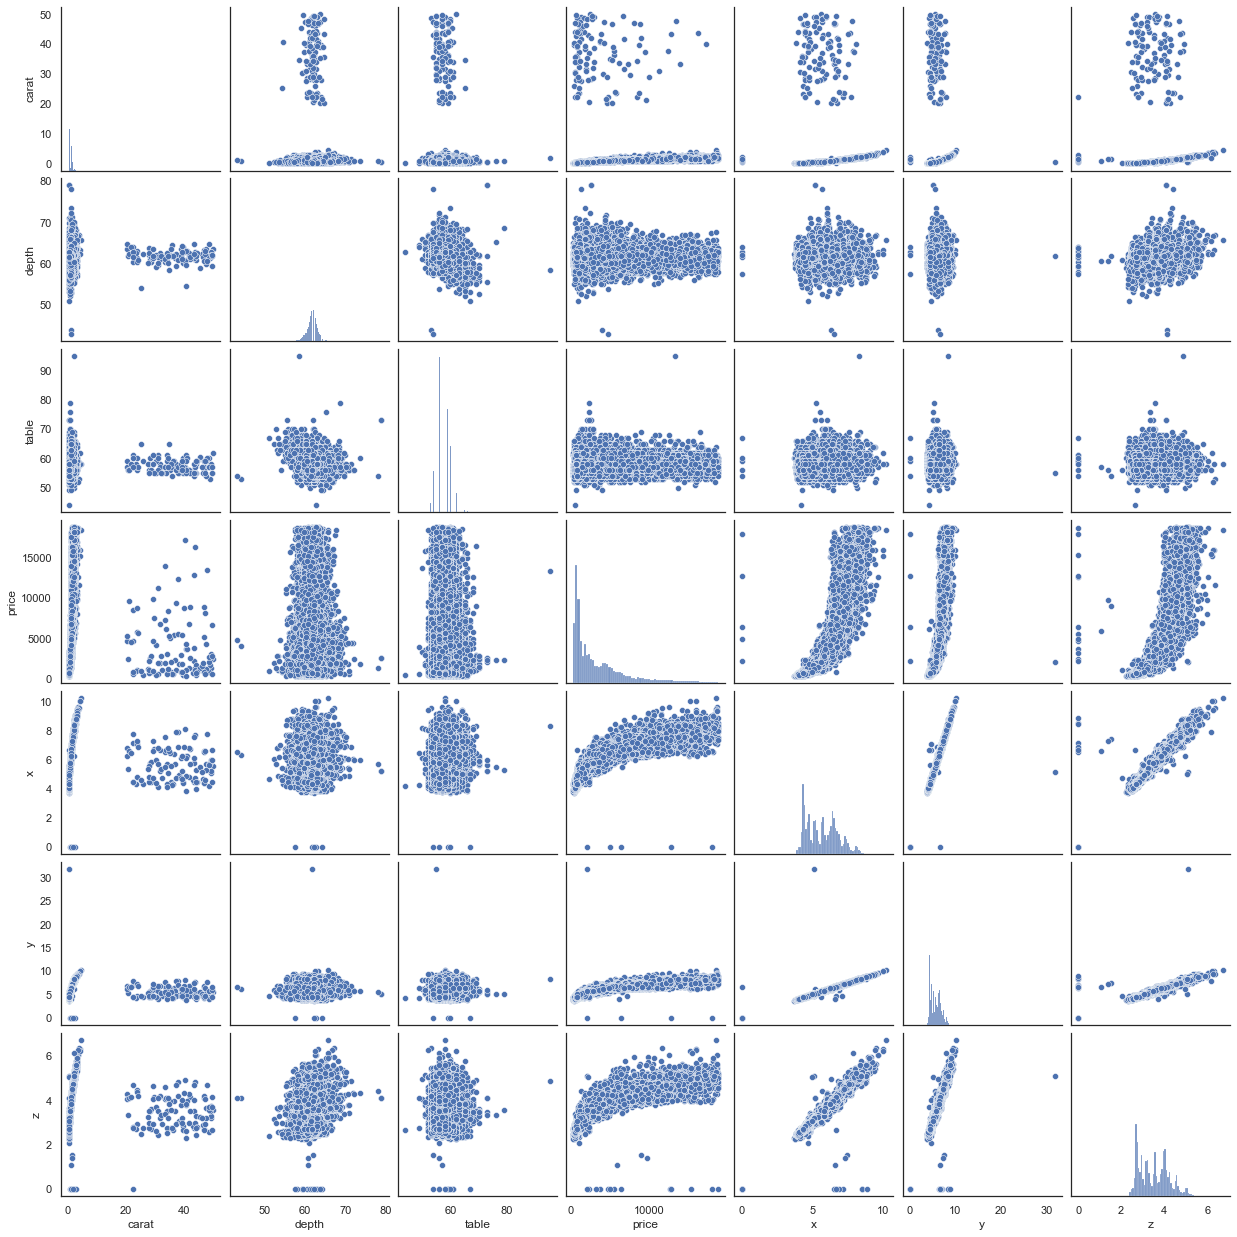

In [12]:
sns.pairplot(df_train);

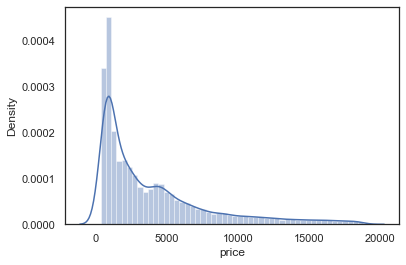

In [13]:
sns.distplot(df_train.price);

### Preparación de datos

In [14]:
# Vemos los valores en los que x, y o z son 0

df_train.query('x==0 or y==0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2203,22.47695,Good,G,I1,64.0,61.0,4731.0,7.15,7.04,0.0
9351,2.25000,Premium,H,SI2,62.8,59.0,18034.0,0.00,0.00,0.0
9816,1.12000,Premium,G,I1,60.4,59.0,2383.0,6.71,6.67,0.0
10893,1.15000,Ideal,G,VS2,59.2,56.0,5564.0,6.88,6.83,0.0
12597,2.25000,Premium,I,SI1,61.3,58.0,15397.0,8.52,8.42,0.0
17931,1.10000,Premium,G,SI2,63.0,59.0,3696.0,6.50,6.47,0.0
21261,2.18000,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0
22062,1.01000,Premium,H,I1,58.1,59.0,3167.0,6.66,6.60,0.0
25191,0.71000,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.0
26607,2.80000,Good,G,SI2,63.8,58.0,18788.0,8.90,8.85,0.0


In [15]:
# En el pairplot anterior vemos que en las variables x, y, z hay valores igual a 0, también en y quitaremos los valores superiores a y

df_train.drop(df_train.query('y>10 or z<2').index, inplace=True) # eliminamos las z>10 y z<2 (outliers)
df_train.drop(df_train.query('x==0 or y==0 or z==0').index, inplace=True) # eliminamos z, x, y = 0 (outliers)

In [16]:
# Vamos a eliminar también los outliers de carat

df_train = df_train[df_train.carat < 15]

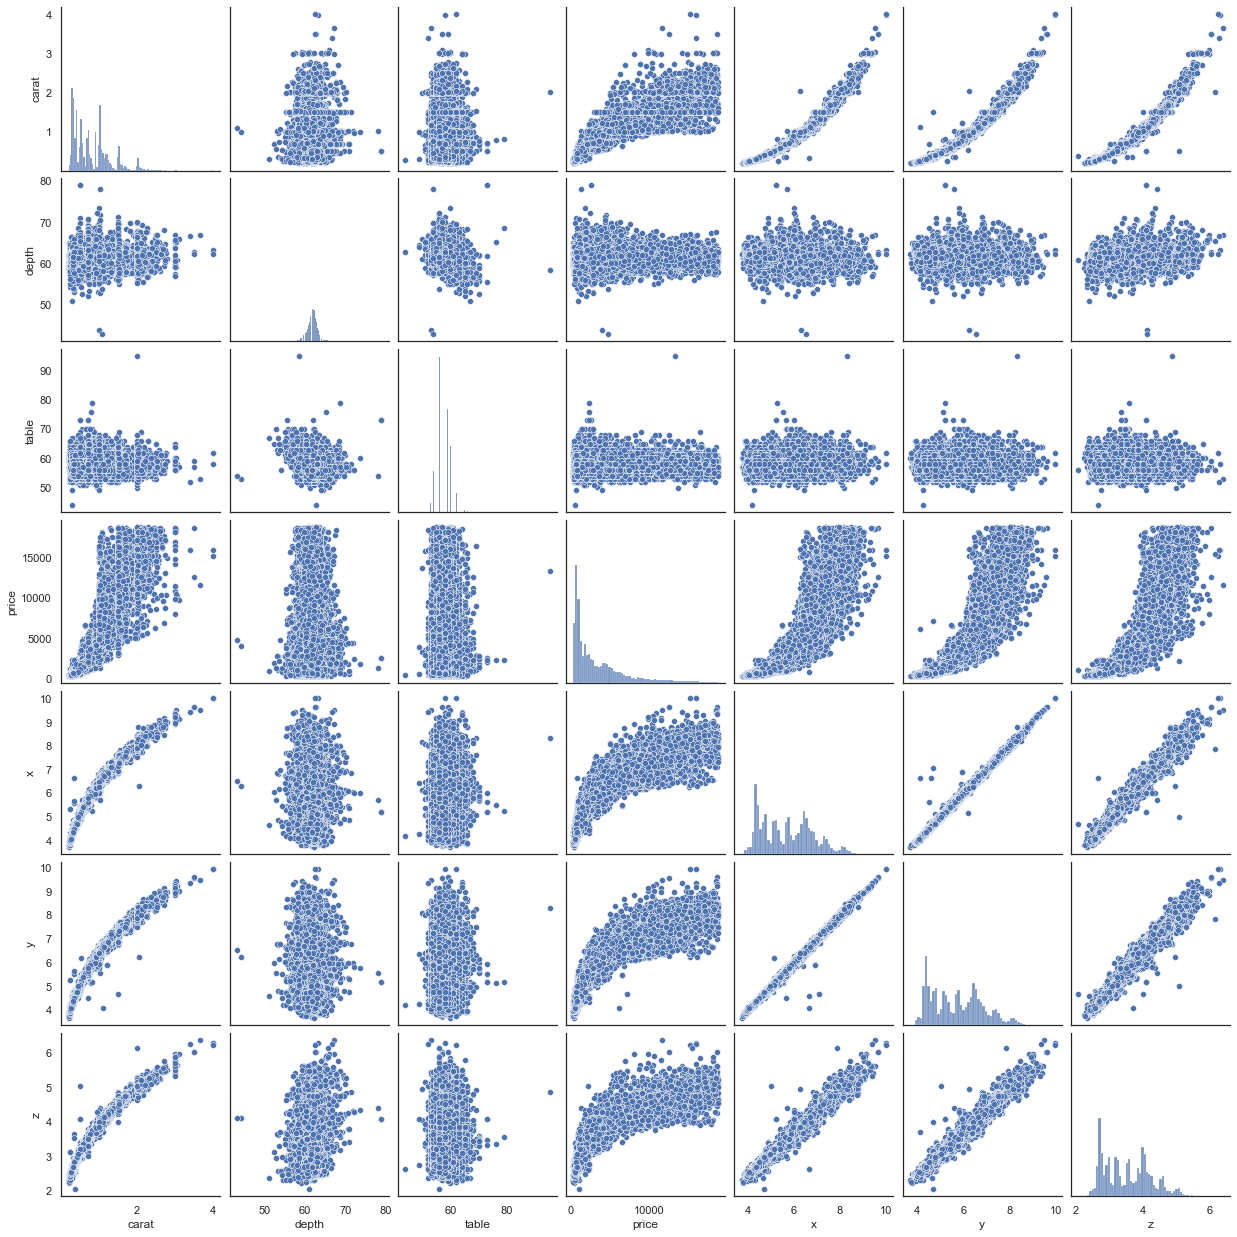

In [17]:
sns.pairplot(df_train);

### Feature Engineering

In [18]:
# Añadimos la variable volumen (pasamos las variables independientes x, y, z a una única variable)

df_train['vol'] = df_train.x * df_train.y * df_train.z

df_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,6.33,6.38,3.95,159.522330
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,6.22,6.25,3.83,148.891250
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,5.19,5.23,3.24,87.945588
3,0.32,Ideal,I,IF,60.8,54.0,673.0,4.44,4.47,2.71,53.784828
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,6.55,6.57,4.00,172.134000


In [19]:
# Eliminamos las columnas x, y, z una vez hecha la transformación

df_train.drop(['x','y','z'], axis=1, inplace=True)
df_train.head()

,carat,cut,color,clarity,depth,table,price,vol
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,159.522330
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,148.891250
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,87.945588
3,0.32,Ideal,I,IF,60.8,54.0,673.0,53.784828
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,172.134000


### Convertimos las variables categóricas

In [20]:
df_train.cut.value_counts() # Hay una errata en Very Geod

Ideal        14291
Premium       9189
Very Good     6413
Good          3223
Very Geod     1625
Fair          1072
Name: cut, dtype: int64

In [21]:
df_train['cut'] = df_train.cut.replace('Very Geod', 'Very Good')

In [22]:
# Damos valores numéricos a las vasriables categóricas
#label_cut = LabelEncoder()
#label_color = LabelEncoder()
#label_clarity = LabelEncoder()


#df_train['cut'] = label_cut.fit_transform(df_train['cut'])
#df_train['color'] = label_color.fit_transform(df_train['color'])
#df_train['clarity'] = label_clarity.fit_transform(df_train['clarity'])

In [23]:
df_train.head()

,carat,cut,color,clarity,depth,table,price,vol
0,1.01,Very Good,F,SI2,62.2,58.0,4332.0,159.522330
1,0.90,Very Good,I,VS2,61.4,58.0,4089.0,148.891250
2,0.53,Ideal,E,VVS2,62.2,54.0,2273.0,87.945588
3,0.32,Ideal,I,IF,60.8,54.0,673.0,53.784828
4,1.06,Ideal,G,VVS2,61.0,57.0,7900.0,172.134000


In [24]:
# Damos valores numéricos a las variables categóricas

df_train.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)

df_train.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)

df_train.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)

df_train.head()

,carat,cut,color,clarity,depth,table,price,vol
0,1.01,3,3,1,62.2,58.0,4332.0,159.522330
1,0.90,3,6,4,61.4,58.0,4089.0,148.891250
2,0.53,5,2,5,62.2,54.0,2273.0,87.945588
3,0.32,5,6,8,60.8,54.0,673.0,53.784828
4,1.06,5,4,5,61.0,57.0,7900.0,172.134000


### Elaboramos el modelo Random Forest

In [25]:
X = df_train.drop(columns = ['price'])
y = df_train.price

In [26]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR(n_estimators = 500,
        max_depth = 50)
rfr.fit(X_train, y_train) # Entrenamos el modelo

train_score=rfr.score(X_train, y_train)  # R2 score
test_score=rfr.score(X_test, y_test)


train_score, test_score # Hay algo de Overfitting (no demasiado)

(0.9971248772596325, 0.9802629063388384)

In [28]:
# Hacemos la predicción
y_pred=rfr.predict(X_test)

In [29]:
# Sacamos el Error absoluto medio
errors = abs(y_pred - y_test)
print('Error absoluto medio:', round(np.mean(errors), 2), 'grados.')

Error absoluto medio: 288.96 grados.


In [30]:
# Sacamos el porcentaje de acierto del modelo
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.48 %.


In [31]:
# Sacamos el error cuadrático medio
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)

rms

558.2876390504241

In [32]:
# Ahora entrenamos el modelo con todos los datos
rfr.fit(X, y)

RandomForestRegressor(max_depth=50, n_estimators=500)

### Transformamos los datos de df_test

In [33]:
# Eliminamos columna id

df_test = df_test.drop('id', axis = 1)

In [34]:
# Añadimos la variable volumen (pasamos las variables independientes x, y, z a una única variable)

df_test['vol'] = df_test.x * df_test.y * df_test.z

df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,vol
0,0.70,Good,J,VVS2,64.3,56.0,5.57,5.63,3.60,112.892760
1,0.31,Premium,E,VVS2,61.9,58.0,4.38,4.35,2.70,51.443100
2,0.84,Premium,F,SI1,59.0,59.0,6.18,6.13,3.63,137.516742
3,1.03,Fair,E,SI1,65.1,58.0,6.35,6.24,4.10,162.458400
4,1.20,Premium,J,SI1,60.5,59.0,6.84,6.79,4.12,191.347632


In [35]:
# Eliminamos las columnas x, y, z una vez hecha la transformación

df_test.drop(['x','y','z'], axis=1, inplace=True)
df_test.head()

,carat,cut,color,clarity,depth,table,vol
0,0.70,Good,J,VVS2,64.3,56.0,112.892760
1,0.31,Premium,E,VVS2,61.9,58.0,51.443100
2,0.84,Premium,F,SI1,59.0,59.0,137.516742
3,1.03,Fair,E,SI1,65.1,58.0,162.458400
4,1.20,Premium,J,SI1,60.5,59.0,191.347632


In [36]:
# Corregimos la errata

df_test['cut'] = df_test.cut.replace('Very Geod', 'Very Good')

In [37]:
# Damos valores numéricos a las vasriables categóricas

df_test.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)

df_test.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)

df_test.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)

df_test.head()

,carat,cut,color,clarity,depth,table,vol
0,0.70,2,7,5,64.3,56.0,112.892760
1,0.31,4,2,5,61.9,58.0,51.443100
2,0.84,4,3,2,59.0,59.0,137.516742
3,1.03,1,2,2,65.1,58.0,162.458400
4,1.20,4,7,2,60.5,59.0,191.347632


In [38]:
len(df_test)

12000

In [39]:
# Hacemos la predicción
predictions=rfr.predict(df_test)

predictions[:10]

array([1819.502     ,  923.26066667, 3430.228     , 4969.54253333,
       4463.306     ,  655.81266667, 1874.58857619, 2457.104     ,
       9767.436     , 4149.667     ])

In [40]:
df_pred = pd.DataFrame({'id': df_2.id,
                        'price':predictions})

df_pred.head()

,id,price
0,0,1819.502000
1,1,923.260667
2,2,3430.228000
3,3,4969.542533
4,4,4463.306000


In [41]:
df_pred.to_csv(r'C:\Users\mario\OneDrive\Escritorio\my_bootcamp\Machine Learning\Ejercicios\Diamonds_predicted\diamonds_pred_3.csv', index = False)